<a href="https://colab.research.google.com/github/SeptianLee/TI05_Septian_0110223149/blob/main/Septian__Implementasi_Regresi_tugas_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model

#Mounting Drive
from google.colab import drive
drive.mount('/content/gdrive')

#Membaca file CSV dari Google Drive, melewati baris yang bermasalah
df = pd.read_csv("gdrive/My Drive/ColabDataMining/dataset/regresi/FuelConsumption.csv", on_bad_lines='skip')
df


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.0+ KB


In [ ]:
df.isnull().sum()

,0
Year,0
MAKE,0
MODEL,0
VEHICLE CLASS,0
ENGINE SIZE,0
CYLINDERS,0
TRANSMISSION,0
FUEL,0
FUEL CONSUMPTION,0
COEMISSIONS,0


In [ ]:
df.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [ ]:
# Menampilkan semua nama kolom dalam dataset
df.columns

# Memilih kolom tertentu dari dataframe untuk analisis lebih lanjut
# Kolom yang dipilih: ENGINE SIZE, CYLINDERS, FUEL CONSUMPTION, COEMISSIONS
cdf = df[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS ']]

# Menampilkan lima baris pertama dari dataframe yang dipilih (cdf)
cdf.head()


,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,1.6,4,10.5,216
1,1.6,4,9.8,205
2,3.2,6,13.7,265
3,3.5,6,15.0,301
4,1.8,4,11.4,230


# **VISUALISASI**

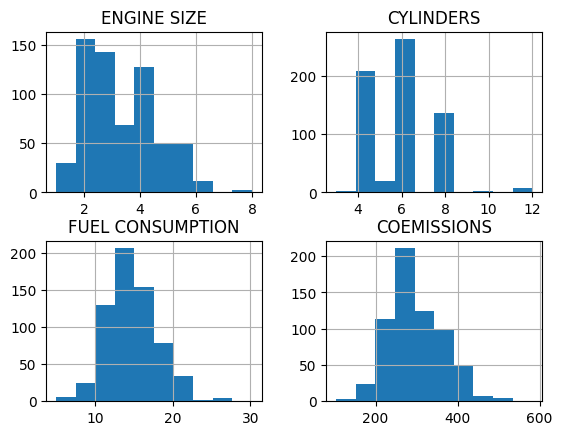

In [ ]:
cdf.columns = cdf.columns.str.strip()  # Menghapus spasi di akhir nama kolom
# Memilih kolom-kolom numerik yang ingin divisualisasikan
visual = cdf[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'COEMISSIONS']]

# Membuat histogram untuk setiap kolom dalam dataframe 'visual'
visual.hist()

# Menampilkan histogram
plt.show()


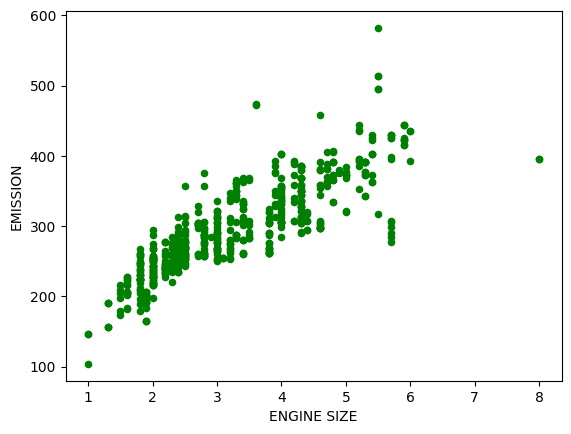

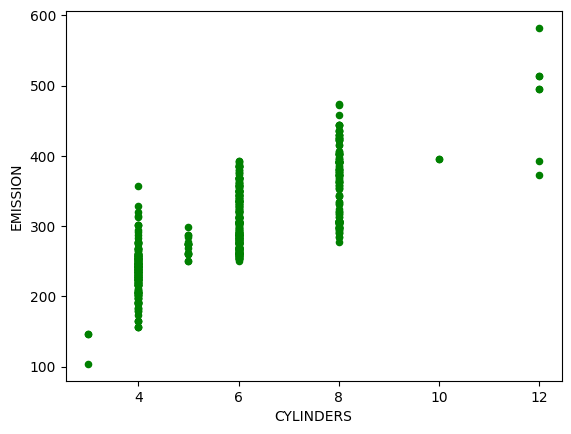

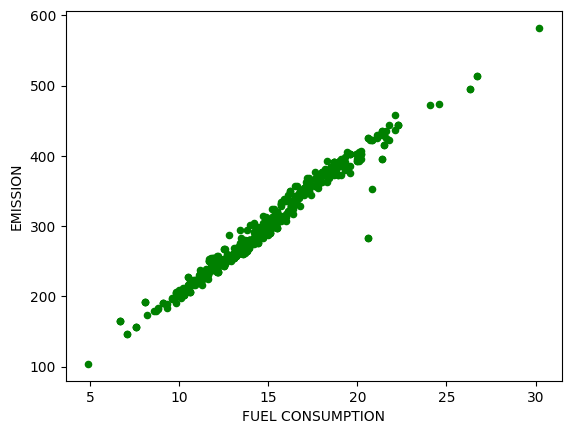

In [ ]:
# Membuat scatter plot untuk setiap kolom numerik terhadap 'COEMISSIONS '
for i in ['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION']:
    cdf.plot.scatter(x=i, y='COEMISSIONS', color='green', xlabel=i, ylabel="EMISSION")
    plt.show()


# **MODEL TRAINING**

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data pelatihan (80%) dan data pengujian (20%) secara langsung
train, test = train_test_split(cdf, test_size=0.20, random_state=42)


In [28]:
# Melakukan regresi linear pada masing-masing kolom independen
coefficient=[]
intercept=[]
regress_model = {
    i: linear_model.LinearRegression().fit(
        train[[i]], train[['COEMISSIONS']]
    ) for i in ['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION']
}

# Menampilkan hasil regresi
for i, reg in regress_model.items():
    print(f"Relation between {i} & 'COEMISSIONS'")
    print("Coefficient :", reg.coef_)
    print("Intercept :", reg.intercept_)
    coefficient.append(reg.coef_)
    intercept.append(reg.intercept_)
    print('\n')



Relation between ENGINE SIZE & 'COEMISSIONS'
Coefficient : [[45.30016431]]
Intercept : [147.95137136]


Relation between CYLINDERS & 'COEMISSIONS'
Coefficient : [[32.86827926]]
Intercept : [105.00863971]


Relation between FUEL CONSUMPTION & 'COEMISSIONS'
Coefficient : [[19.572552]]
Intercept : [8.77548259]




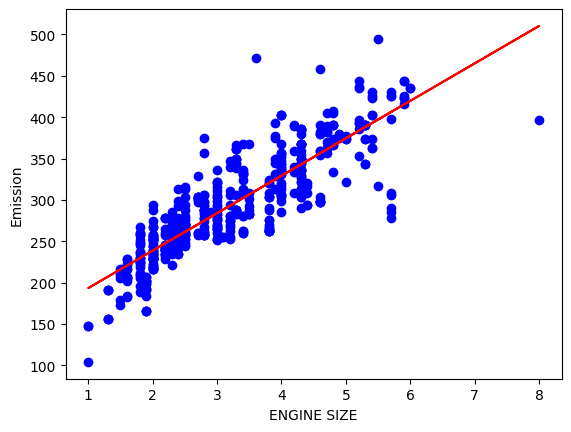

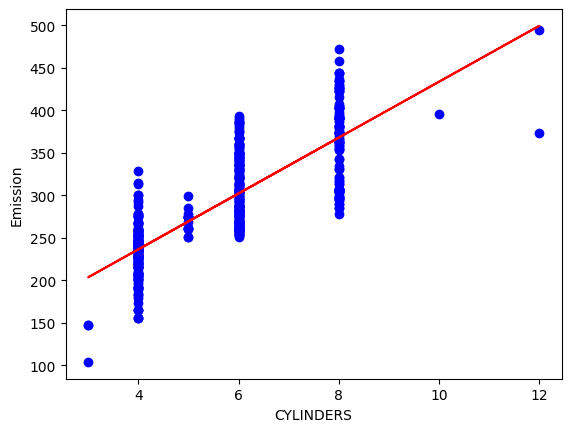

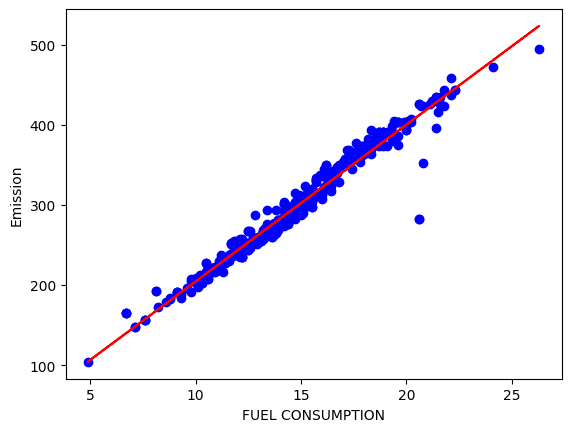

In [30]:
# Menyusun model persamaan linear menggunakan parameter regresi (koefisien dan intersep)
for j, i in enumerate(['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION']):
    plt.scatter(train[i], train['COEMISSIONS'], color='blue')  # Menampilkan titik data

    x = train[i].values
    y = coefficient[j][0] * x + intercept[j]

    plt.plot(x, y, '-r')  # Menampilkan garis hasil regresi (warna merah)
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()  # Menampilkan grafik


In [31]:
# Menghitung performa model pada data pengujian dengan metrik error
from sklearn.metrics import r2_score

# Menghitung dan menampilkan error untuk setiap fitur
for i, feature in enumerate(['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION']):
    # Mengambil data fitur dan target dari data pengujian
    test_x = test[[feature]]  # Menggunakan dataframe dengan nama fitur
    test_y = np.asanyarray(test[['COEMISSIONS']])

    # Memprediksi nilai emisi CO2 menggunakan model regresi
    test_y_ = regress_model[feature].predict(test_x)

    # Menampilkan error fitting model
    print(f"Fitting Error between {feature} & 'CO2EMISSIONS'")
    print(f"Mean absolute error: {np.mean(np.absolute(test_y_ - test_y)):.2f}")
    print(f"Residual sum of squares (MSE): {np.mean((test_y_ - test_y) ** 2):.2f}")
    print(f"R2-score: {r2_score(test_y_, test_y):.2f}\n")


Fitting Error between ENGINE SIZE & 'CO2EMISSIONS'
Mean absolute error: 28.00
Residual sum of squares (MSE): 1720.37
R2-score: 0.53

Fitting Error between CYLINDERS & 'CO2EMISSIONS'
Mean absolute error: 33.65
Residual sum of squares (MSE): 1825.88
R2-score: 0.56

Fitting Error between FUEL CONSUMPTION & 'CO2EMISSIONS'
Mean absolute error: 7.77
Residual sum of squares (MSE): 98.84
R2-score: 0.98



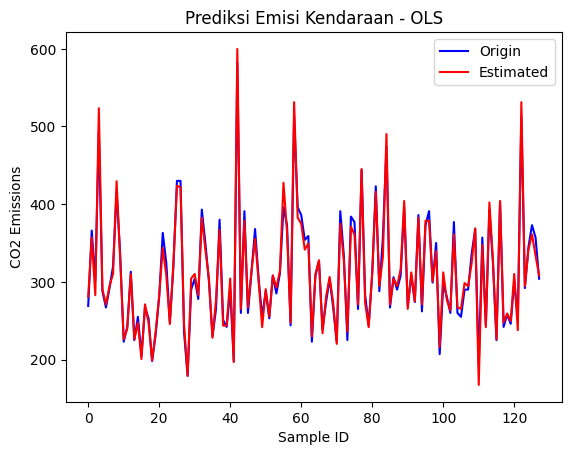

In [32]:
# Visualize Original vs Predicted
plt.plot(range(len(test_y)), test_y, label='Origin', color='blue')
plt.plot(range(len(test_y)), test_y_, label='Estimated', color='red')
plt.title("Prediksi Emisi Kendaraan - OLS")
plt.xlabel("Sample ID")
plt.ylabel("CO2 Emissions")
plt.legend()
plt.show()